In [1]:
import numpy as np
import pandas as pd
from project2_functions import *
from itertools import combinations
from scipy.sparse.linalg import svds
from tqdm import tqdm

In [2]:
movie_ratings = pd.read_csv('MovieRankings36.csv', header = None)
my_row = pd.DataFrame([np.nan, 4, 4.5, np.nan, 4, 3, 4, 4, 3, np.nan, 4, 4, np.nan, np.nan, np.nan, 4, 4.5, 4.5, np.nan, 3.5])
movie_ratings = movie_ratings.append(my_row.T).to_numpy()
print(movie_ratings.shape)

(37, 20)


In [3]:
complete_rows = [0,1,2,3,7,10,12,15,24,28]
complete_columns = [0,1,2,3,4,5,7,8,9,10,12,14,15,17,18,19]
complete_movie_ratings = movie_ratings[complete_rows,:][:,complete_columns]
print(complete_movie_ratings)

[[4.5 4.  4.5 4.  3.  3.  4.  3.5 4.8 4.7 4.  4.  4.6 4.4 4.  2.9]
 [5.  4.  4.  4.  3.  4.  5.  3.  5.  4.  5.  3.  4.  5.  3.  3. ]
 [4.  3.9 4.3 4.8 3.7 3.7 4.5 4.4 4.4 4.7 3.9 4.  3.9 4.4 3.6 3.1]
 [5.  4.  4.  4.  3.  4.  5.  3.  5.  4.  5.  3.  4.  5.  3.  3. ]
 [4.  4.5 3.5 3.5 4.  3.  4.  4.  4.  3.5 3.5 4.  3.  4.5 3.  2. ]
 [3.  4.5 5.  3.  5.  3.  3.5 4.  4.  3.5 2.  3.  3.  5.  5.  4. ]
 [5.  4.  3.  4.5 3.  4.5 5.  4.  5.  5.  3.5 5.  5.  4.  2.  3. ]
 [3.  4.5 3.  4.  4.  4.  5.  3.  4.5 3.5 5.  4.5 4.  3.  4.  2. ]
 [5.  5.  3.  4.  3.  2.  5.  3.  4.  5.  3.  3.  5.  5.  4.  3. ]
 [4.  4.  2.  3.  4.  4.  4.  5.  3.  4.  4.  3.  3.  3.  4.  2. ]]


C:\Users\Alexander\anaconda3\envs\reservoir-rls\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alexander\anaconda3\envs\reservoir-rls\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


[0.36023356 0.24307317]


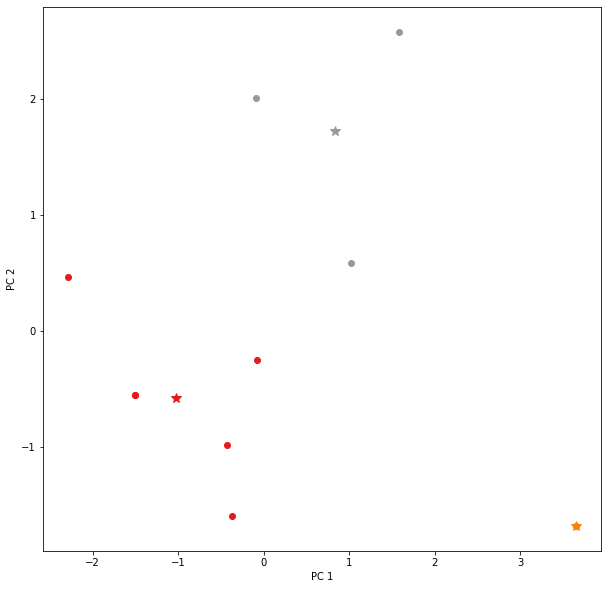

[0. 0. 0. 0. 2. 1. 0. 2. 0. 2.]


In [4]:
means, clusters, itr = kmeans(complete_movie_ratings,3,method = 'Random', plot = True)
print(clusters)

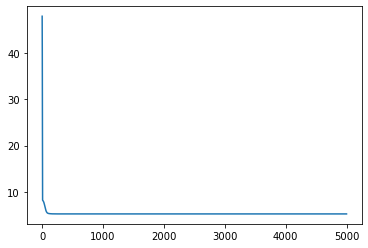

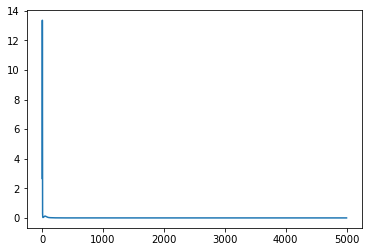

5.303612953544195


In [5]:
def aconst0(itr,a):
    return a
a = 1e-2
aconst = lambda itr: aconst0(itr,a)
W, H, resnorm, runtime, gradnorm = projectedGD(3, complete_movie_ratings, aconst, maxiter = 5000)
plt.plot(resnorm)
plt.show()
plt.plot(gradnorm)
plt.show()
print(resnorm[-1])
plt.plot(runtime)
plt.show()

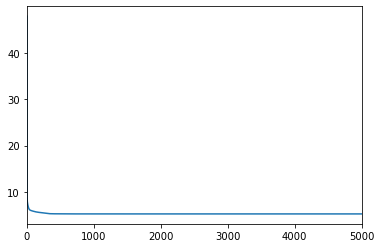

5.303612953544194


In [6]:
W, H, resnorm, runtime = LeeSeung(3, complete_movie_ratings,maxiter = 5000)
plt.plot(resnorm)
plt.xlim(0,5000)
plt.show()
print(resnorm[-1])

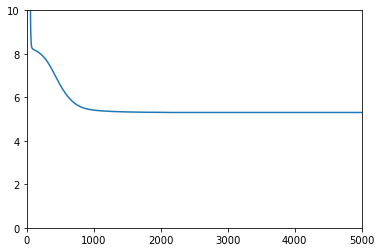

5.303612953544195


In [7]:
def aconst0(itr,a):
    return a
a = 1e-3
aconst = lambda itr: aconst0(itr,a)
W, H, resnorm, runtime, gradnorm = PGD_LS(3, complete_movie_ratings,aconst, maxiter = 5000, PG_iter = 2000)
plt.plot(resnorm)
plt.xlim(0,5000)
plt.ylim(0,10)
plt.show()
print(resnorm[-1])

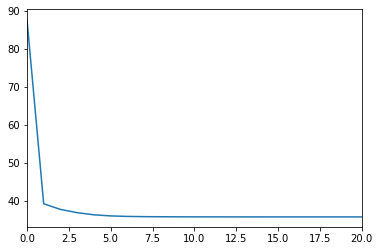

35.83269879229239


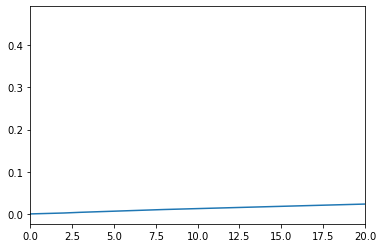

0.009016300002258504


In [174]:
X, Y, resnorm, runtime = LRF_alt(3, movie_ratings, 1e-1, maxiter = 500)
plt.plot(resnorm)
plt.xlim(0,20)
plt.show()
print(resnorm[-1])
plt.plot(runtime)
plt.xlim(0,20)
plt.show()
print(runtime[6])

3


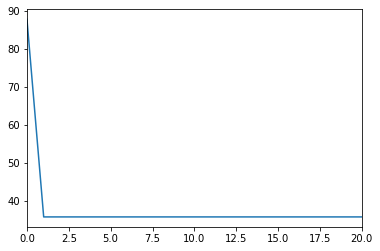

35.83143573319264


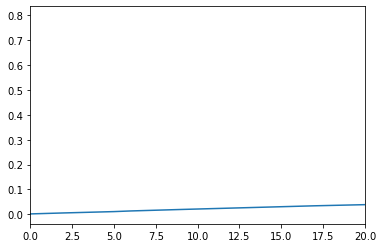

0.0019958000011683907


In [173]:
M, resnorm, runtime = LR_nuclear(movie_ratings, 15, maxiter = 500)
print(np.linalg.matrix_rank(M))
plt.plot(resnorm)
plt.xlim(0,20)
plt.show()
print(resnorm[-1])
plt.plot(runtime)
plt.xlim(0,20)
plt.show()
print(runtime[0])

In [10]:
C, U, R = CUR(complete_movie_ratings, 3, 2)

In [11]:
textdata = pd.read_csv('features.csv',header = None).to_numpy().astype('float64')
textclasses = pd.read_csv('classes.csv',header = None).to_numpy().astype('float64')

In [12]:
kvals = np.arange(2,11)
avals = np.arange(1,9)
tests = 100
num_trials = tests*len(kvals)*len(avals)
mean_ratio = np.zeros((len(kvals),len(avals)))

In [13]:
from scipy.sparse.linalg import svds
mean_columns_selected = np.zeros((len(kvals),len(avals)))
with tqdm(total = num_trials) as pbar:
    for i in range(len(kvals)):
        U, S, Vt = svds(textdata, k = kvals[i])
        Mk = (U * S) @ Vt
        Mk_norm = np.linalg.norm(textdata - Mk)
        for j in range(len(avals)):
            ratios = np.zeros(tests)
            columns_selected = np.zeros(tests)
            for itr in range(tests):
                C, U, R = CUR(textdata, kvals[i],avals[j])
                ratios[itr] = np.linalg.norm(textdata - C @ U @ R.T)/Mk_norm
                columns_selected[itr] = C.shape[1]
                pbar.update(1)
            mean_ratio[i,j] = np.mean(ratios)
            mean_columns_selected[i,j] = np.mean(columns_selected)

  1%|▌                                                                               | 47/7200 [00:13<33:30,  3.56it/s]


KeyboardInterrupt: 

In [ ]:
np.savetxt('CUR_mean_ratio.csv', mean_ratio, delimiter = ',')
np.savetxt('CUR_mean_columns_selected.csv', mean_columns_selected, delimiter = ',')

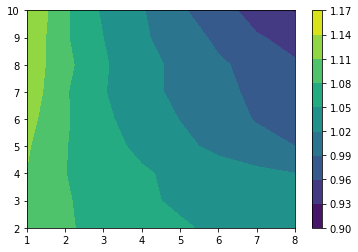

In [162]:
mean_ratio = np.loadtxt('CUR_mean_ratio.csv', delimiter = ',')
X, Y = np.meshgrid(avals, kvals)
plt.contourf(X, Y, mean_ratio)
plt.colorbar()
plt.show()
# plt.contourf(X, Y, mean_columns_selected)
# plt.colorbar()
# plt.show()

In [ ]:
textdata = pd.read_csv('features_number.csv',header = None).to_numpy().astype('float64')
textclasses = pd.read_csv('classes_number.csv',header = None).to_numpy().astype('float64')
kvals = np.arange(2,11)
avals = np.arange(1,9)
tests = 100
num_trials = tests*len(kvals)*len(avals)
mean_ratio = np.zeros((len(kvals),len(avals)))
from scipy.sparse.linalg import svds
mean_columns_selected = np.zeros((len(kvals),len(avals)))
with tqdm(total = num_trials) as pbar:
    for i in range(len(kvals)):
        U, S, Vt = svds(textdata, k = kvals[i])
        Mk = (U * S) @ Vt
        Mk_norm = np.linalg.norm(textdata - Mk)
        for j in range(len(avals)):
            ratios = np.zeros(tests)
            columns_selected = np.zeros(tests)
            for itr in range(tests):
                C, U, R = CUR(textdata, kvals[i],avals[j])
                ratios[itr] = np.linalg.norm(textdata - C @ U @ R.T)/Mk_norm
                columns_selected[itr] = C.shape[1]
                pbar.update(1)
            mean_ratio[i,j] = np.mean(ratios)
            mean_columns_selected[i,j] = np.mean(columns_selected)
np.savetxt('CUR_mean_ratio_number.csv', mean_ratio, delimiter = ',')
np.savetxt('CUR_mean_columns_selected_number.csv', mean_columns_selected, delimiter = ',')

In [ ]:
X, Y = np.meshgrid(avals, kvals)
plt.contourf(X, Y, mean_ratio)
plt.colorbar()
plt.show()
plt.contourf(X, Y, mean_columns_selected)
plt.colorbar()
plt.show()

In [104]:
textdata = pd.read_csv('features_number.csv',header = None).to_numpy().astype('float64')
k = 10
a = 6
def leverage_score(A, k):
    U, S, Vt = svds(A, k = k)
    scores = np.sum(Vt**2.0,axis = 0)/k
    print(Vt.shape)
    return scores
best_scores = np.argsort(leverage_score(textdata,k))[::-1]
skiprows = [i for i in range(9)]
features = pd.read_csv('features_idx.txt',sep = ' ', skiprows = skiprows, header = None)
print(features.iloc[best_scores[:10]])

(10, 18446)
           0          1
51        52        gif
7771    7772       shim
7          8        the
2124    2125     bullet
7236    7237       limo
17        18        and
5138    5139        del
2434    2435      radio
5173    5174        los
10896  10897  uruguaysc


In [92]:
textdata = pd.read_csv('features_number.csv',header = None).to_numpy().astype('float64')
k = 10
a = 6
from scipy.linalg import svd
from scipy import sparse
def leverage_score(A, k):
    A = sparse.csr_matrix(A)
    U, S, Vt = svds(A, k = k)
    print(S)
    print(Vt)
    err = (U * S) @ Vt - A
    print(np.amax(np.abs(err)))
    # Vt = Vt[:k]
    scores = np.sum(Vt**2,axis = 0)/k
    return scores
print(leverage_score(textdata,k))


[ 226.35231322  235.53615321  270.27453819  288.40870643  344.38931875
  359.13876758  402.70249536  457.67761563  852.1020619  1226.55140194]
[[-3.00641311e-01 -1.07986316e-02 -3.17610729e-02 ...  6.48740439e-05
   3.24370220e-05  6.48740439e-05]
 [-1.77853848e-01 -2.83321478e-03 -1.91281041e-02 ...  4.02724948e-05
   2.01362474e-05  4.02724948e-05]
 [ 1.19194641e-01  2.73790854e-04  1.19862348e-02 ... -8.81559702e-06
  -4.40779851e-06 -8.81559702e-06]
 ...
 [ 4.84902019e-02  6.26574254e-04 -3.07672174e-03 ... -1.66792065e-05
  -8.33960325e-06 -1.66792065e-05]
 [-1.11045275e-01 -2.64142209e-03 -1.41121683e-02 ... -1.34699569e-05
  -6.73497847e-06 -1.34699569e-05]
 [ 3.69874617e-02  9.36161467e-04  5.91956523e-03 ...  1.00748196e-05
   5.03740981e-06  1.00748196e-05]]
127.15052174299136
[2.17717520e-02 1.46602185e-05 2.07436654e-04 ... 9.37980107e-10
 2.34495027e-10 9.37980107e-10]


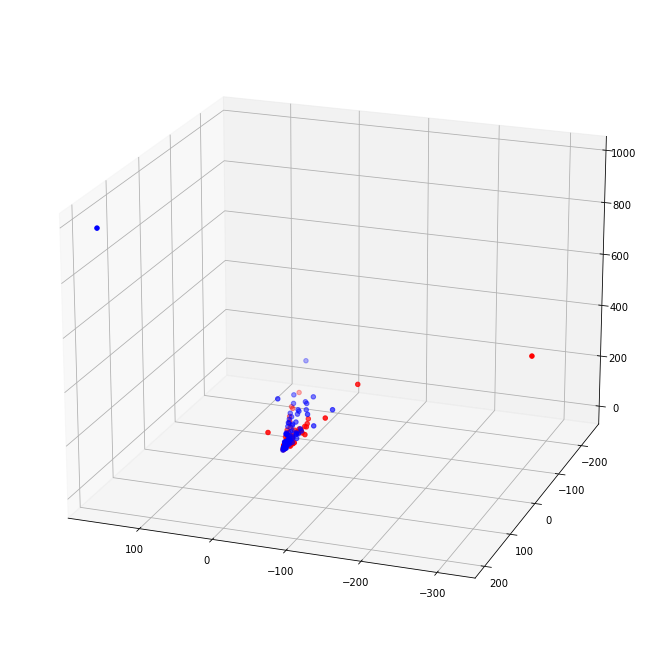

In [15]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(indiana_data[:,0],indiana_data[:,1],indiana_data[:,2],c = 'b')
ax.scatter(florida_data[:,0],florida_data[:,1],florida_data[:,2],c = 'r')
ax.view_init(20,110)
plt.show()

           0          1
51        52        gif
7771    7772       shim
7          8        the
7236    7237       limo
2124    2125     bullet
5138    5139        del
17        18        and
10896  10897  uruguaysc


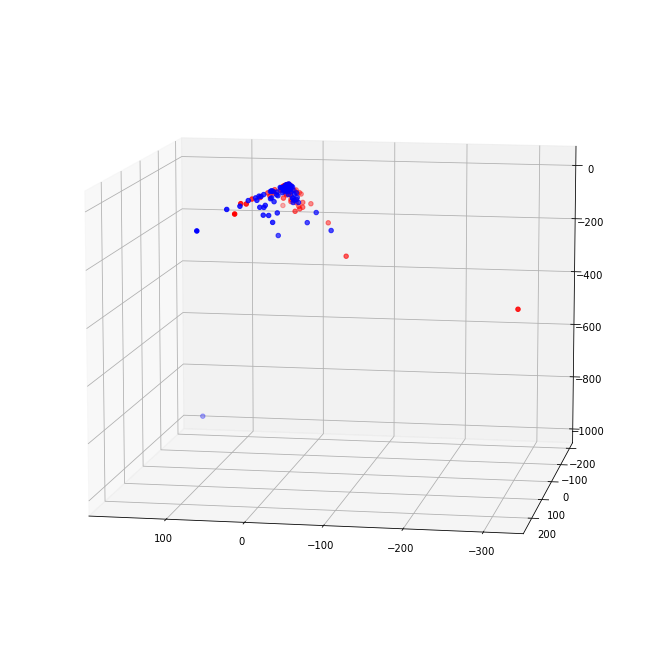

In [16]:
textdata = pd.read_csv('features_number.csv',header = None).to_numpy().astype('float64')
best_scores = np.argsort(leverage_score(textdata,k))[::-1][:k]
print(features.iloc[best_scores])
new_A = textdata[:,best_scores[:5]]
Unew, Snew, Vtnew = svds(new_A, k = 3)
PC_projected = new_A @ Vtnew.T
featuredata = pd.read_csv('classes.csv',header = None).to_numpy().astype('float64')
indiana_data = PC_projected[featuredata[:,0] == -1.]
florida_data = PC_projected[featuredata[:,0] == 1.]
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(indiana_data[:,0],indiana_data[:,1],indiana_data[:,2],c = 'b')
ax.scatter(florida_data[:,0],florida_data[:,1],florida_data[:,2],c = 'r')
ax.view_init(10,100)
plt.show()

(10, 18446)


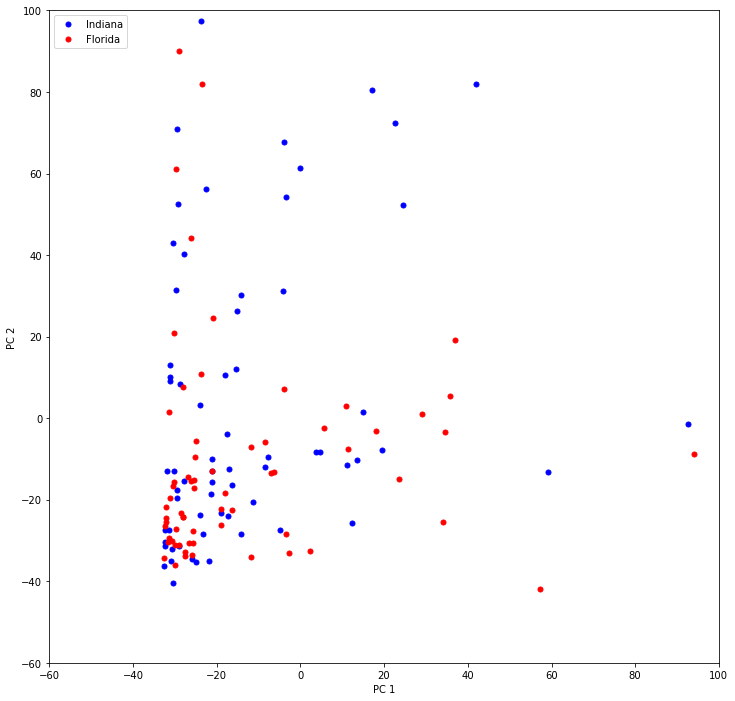

In [115]:
textdata = pd.read_csv('features_number.csv',header = None).to_numpy().astype('float64')
k = 10
scores = leverage_score(textdata,k)
best_scores = np.argsort(scores)[::-1][:5]
new_A = textdata[:,best_scores]
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
PC_projected = pca.fit_transform(new_A)
featuredata = pd.read_csv('classes.csv',header = None).to_numpy().astype('float64')
indiana_data = PC_projected[featuredata[:,0] == -1.]
florida_data = PC_projected[featuredata[:,0] == 1.]
fig = plt.figure(figsize = (12,12))
plt.plot(indiana_data[:,0],indiana_data[:,1],'b.', markersize = 10,label = 'Indiana')
plt.plot(florida_data[:,0],florida_data[:,1],'r.', markersize = 10,label = 'Florida')
plt.xlim(-60,100)
plt.ylim(-60,100)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.savefig('PCs_no_reduction_best5nls.png',bbox_inches='tight')
plt.show()

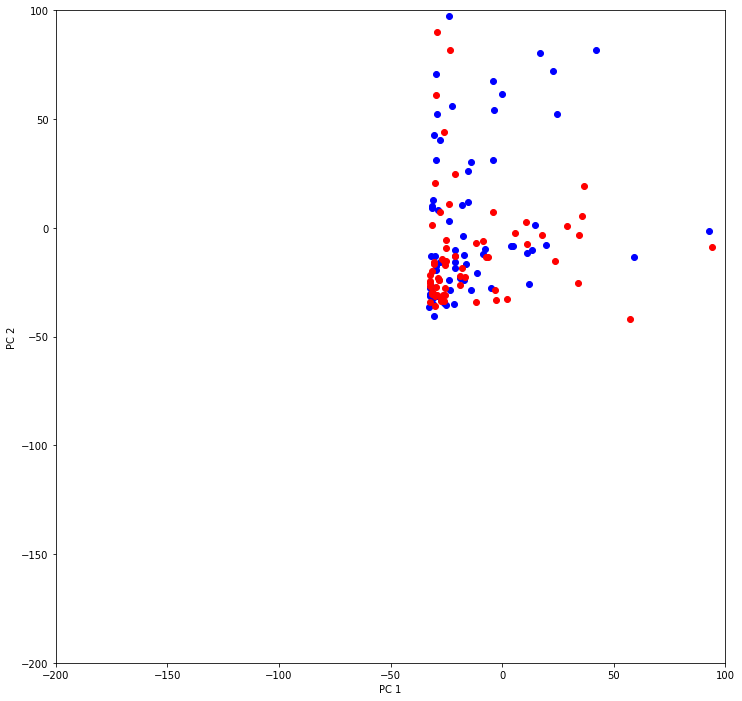

In [18]:
best_scores = np.argsort(leverage_score(C, k))[::-1][:5]
new_C = C[:,best_scores]
pca = PCA(n_components = 2)
PC_projected = pca.fit_transform(new_C)
indiana_data = PC_projected[featuredata[:,0] == -1.]
florida_data = PC_projected[featuredata[:,0] == 1.]
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.scatter(indiana_data[:,0],indiana_data[:,1],c = 'b')
ax.scatter(florida_data[:,0],florida_data[:,1],c = 'r')
ax.set_xlim(-200,100)
ax.set_ylim(-200,100)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
plt.show()

In [19]:
fl_zip_codes = [str(i) for i in [239,305,321,352,386,407,448,561,656,689,727,754,772,786,813,850,863,904,941,954]]
in_zip_codes = [str(i) for i in [219,574,260,765,317,463,812,930]]
full_zip_codes = fl_zip_codes + in_zip_codes

fiter = 0
idx = 0
idxs = np.array([]) 
for feature in features.iloc[:,1]:
    if [ele for ele in full_zip_codes if(ele in feature)]:
        if len(feature) == 12 or len(feature) == 3:
            idxs = np.append(idxs,idx)
            print(feature)
    idx += 1
print(len(idxs))

305-654-0017
954-922-3000
561-651-7004
305
305-661-9900
305-480-4106
305-247-6751
305-448-4425
305-663-9573
305-279-2646
786-662-8106
305-805-5075
305-662-8106
305-655-2229
561-218-8580
954-227-2386
305-892-2738
954-389-2471
954-972-6458
954-680-9298
954-680-3427
954-476-7100
954-427-1216
954-752-9700
954-474-0400
954-450-5956
954-435-1128
954-365-2002
954-344-3344
954-252-8215
954-659-2899
943-968-7352
954-757-8301
954-929-3090
954-922-0793
954-442-3386
954-341-6422
954-680-1609
954-583-7118
954-433-5604
954-968-7352
954-346-8310
954-447-0530
954-433-7110
954-987-2000
954-493-9763
954-962-5501
954-564-1577
954-431-3600
954-467-1774
561-791-2174
561-691-1404
561-741-3389
561-641-4479
561-482-3745
561-792-2314
561-994-4673
561-793-1007
561-305-3558
561-790-9321
561-575-3962
561-386-1616
561-852-3333
561-362-5110
561-994-5000
561-832-6777
561-624-9118
561-784-4579
561-795-3167
561-966-8013
561-837-2612
561-641-0749
561-241-3018
561-483-0666
954
305-940-0442
305-821-7032
954-288-8691
305-

In [126]:
fl_zip_codes = [str(i) for i in [239,305,321,352,386,407,448,561,656,689,727,754,772,786,813,850,863,904,941,954]]
in_zip_codes = [str(i) for i in [219,574,260,765,317,463,812,930]]
full_zip_codes = fl_zip_codes + in_zip_codes
numbers = [str(i) for i in range(10)]
fiter = 0
idx = 0
idxs = np.array([]) 
for feature in features.iloc[:,1]:
    if feature.isdigit() or [ele for ele in full_zip_codes if(ele in feature)]:
        if len(feature) == 12 or len(feature) == 3 or len(feature) == 5:
            idxs = np.append(idxs,idx)
    elif not [ele for ele in numbers if(ele in feature)] and len(feature) > 6:
        idxs = np.append(idxs,idx)
    idx += 1
print(len(idxs))
idxs = [int(idx) for idx in idxs]

10110


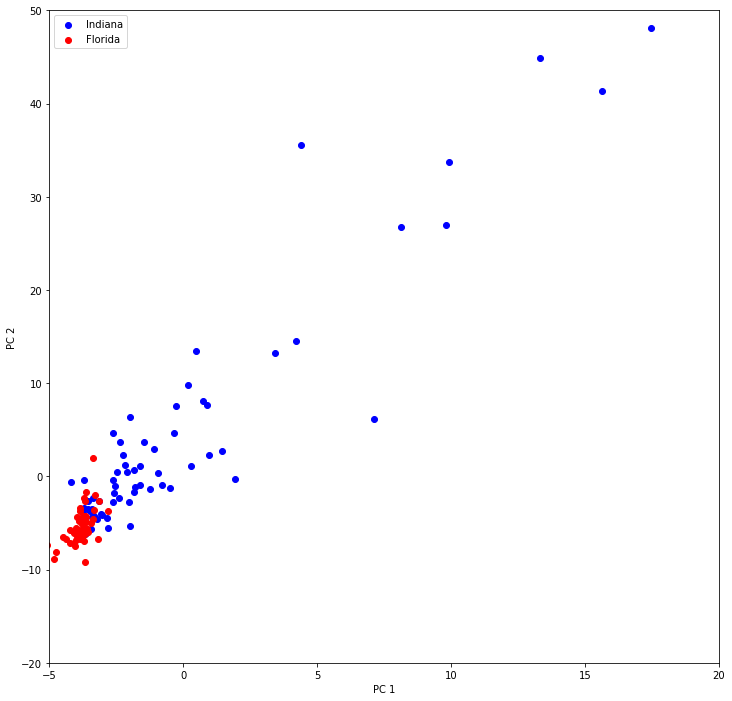

In [151]:
textdata = pd.read_csv('features_number.csv',header = None).to_numpy().astype('float64')
new_A = textdata[:,idxs]
pca = PCA(n_components = 4)
PC_projected = pca.fit_transform(new_A)
indiana_data = PC_projected[featuredata[:,0] == -1.]
florida_data = PC_projected[featuredata[:,0] == 1.]
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.scatter(indiana_data[:,0],indiana_data[:,1],c = 'b', label = 'Indiana')
ax.scatter(florida_data[:,0],florida_data[:,1],c = 'r', label = 'Florida')
ax.set_xlim(-5,20)
ax.set_ylim(-20,50)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
plt.legend()
plt.savefig('PCs_reduced_mat_count.png',bbox_inches='tight')
plt.show()

(50, 10110)
           0           1
9646    9647  clearpixel
0          1     florida
17237  17238   littlepaw
13318  13319  evansville
2437    2438     weather


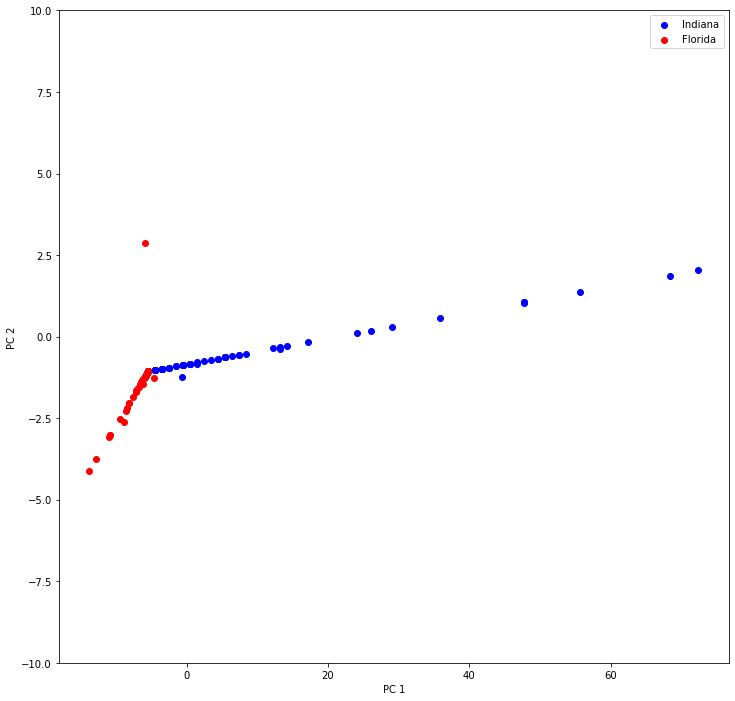

In [160]:
textdata = pd.read_csv('features_number.csv',header = None).to_numpy().astype('float64')
new_A = textdata[:,idxs]
k = 50
scores = leverage_score(new_A,k)
reduced_A = new_A[:,np.argsort(scores)[::-1][:5]]
best_idxs = np.argsort(scores)[::-1][:5]
best_idxs = [idxs[int(i)] for i in best_idxs]
print(features.iloc[best_idxs])
pca = PCA(n_components = 4)
PC_projected = pca.fit_transform(reduced_A)
indiana_data = PC_projected[featuredata[:,0] == -1.]
florida_data = PC_projected[featuredata[:,0] == 1.]
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.scatter(indiana_data[:,0],indiana_data[:,1],c = 'b', label = 'Indiana')
ax.scatter(florida_data[:,0],florida_data[:,1],c = 'r', label = 'Florida')
# ax.set_xlim(-4.25,-4.15)
ax.set_ylim(-10,10)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
plt.legend()
plt.savefig('PCs_reduced_mat_maxleverage_count.png',bbox_inches='tight')
plt.show()

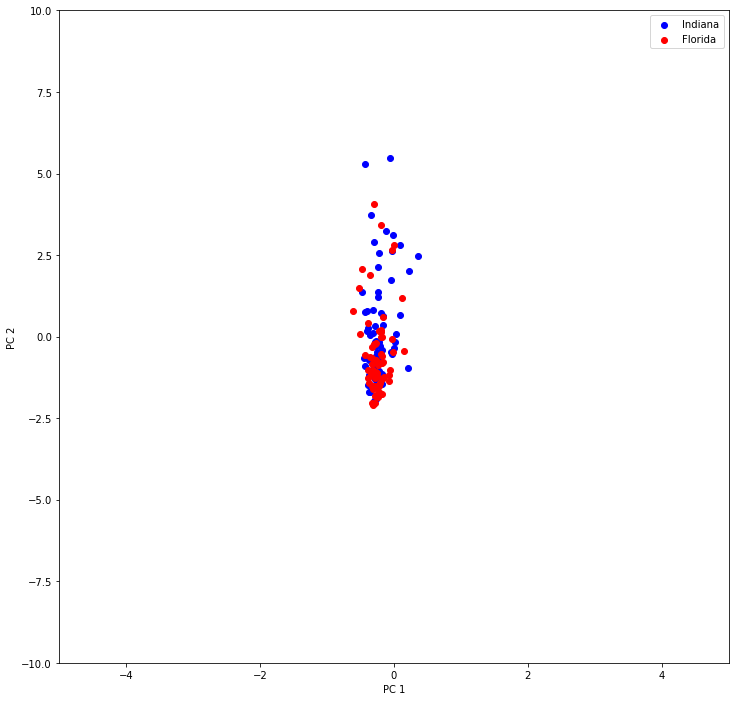

In [155]:
textdata = pd.read_csv('features.csv',header = None).to_numpy().astype('float64')
new_A = textdata[:,idxs]
pca = PCA(n_components = 4)
PC_projected = pca.fit_transform(new_A)
indiana_data = PC_projected[featuredata[:,0] == -1.]
florida_data = PC_projected[featuredata[:,0] == 1.]
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.scatter(indiana_data[:,0],indiana_data[:,1],c = 'b', label = 'Indiana')
ax.scatter(florida_data[:,0],florida_data[:,1],c = 'r', label = 'Florida')
ax.set_xlim(-5,5)
ax.set_ylim(-10,10)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
plt.legend()
plt.savefig('PCs_reduced_mat_binary.png',bbox_inches='tight')
plt.show()

(50, 10110)
           0           1
13318  13319  evansville
185      186     welcome
146      147     contact
7330    7331     indiana
0          1     florida


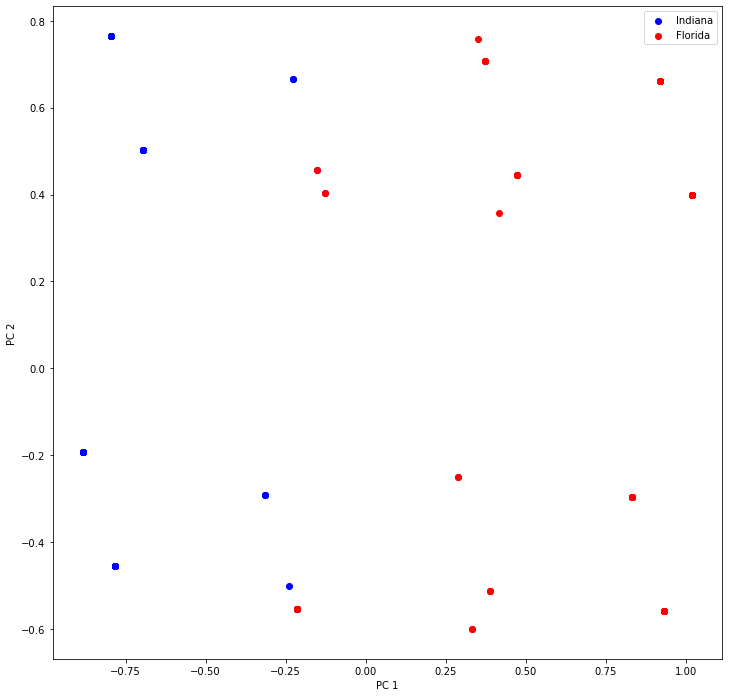

In [161]:
textdata = pd.read_csv('features.csv',header = None).to_numpy().astype('float64')
new_A = textdata[:,idxs]
k = 50
scores = leverage_score(new_A,k)
reduced_A = new_A[:,np.argsort(scores)[::-1][:5]]
best_idxs = np.argsort(scores)[::-1][:5]
best_idxs = [idxs[int(i)] for i in best_idxs]
print(features.iloc[best_idxs])
pca = PCA(n_components = 4)
PC_projected = pca.fit_transform(reduced_A)
indiana_data = PC_projected[featuredata[:,0] == -1.]
florida_data = PC_projected[featuredata[:,0] == 1.]
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.scatter(indiana_data[:,0],indiana_data[:,1],c = 'b', label = 'Indiana')
ax.scatter(florida_data[:,0],florida_data[:,1],c = 'r', label = 'Florida')
# ax.set_xlim(-4.25,-4.15)
# ax.set_ylim(-10,10)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
plt.legend()
plt.savefig('PCs_reduced_mat_maxleverage_binary.png',bbox_inches='tight')
plt.show()